<img src="sarcasm.jpg" style = "width:800px; height:200px"/> 

# "SARCASM" 

## A PREDICTIVE STUDY OF SARCASTIC COMMENTS USING MACHINE LEARNING

***
***IOD CAPSTONE PROJECT BY YUAN CHAN***
***

Extract from dataset source KAGGLE:
https://www.kaggle.com/danofer/sarcasm

## Overview and Project objective:

To investigate a subset of 1.3 million comments (150000) from the Internet commentary website Reddit) through **supervised learning machine learning approaches (both conventional and deep learning algorithms)** to predict the occurence of sarcastic content.

The investigation will undertake feature engineering for potential extraction of sarcastic markers and attempt to address both text meta-features as well as the context of comments. 

Conventional machine learning approaches (contained in this notebook) will address the text from the "comment" feature in the dataset. The "parent comment" or context of the comment in question will be addressed indirectly through the use of meta-features such as cosine similarity and sentiment polarity with the "comment".

Deep learning (contained in separate notebooks) algorithms will accept the direct input of both the "comment" and "parent comment" texts for processing and identification of prediction features.

## Context:

The dataset was generated by scraping comments from Reddit containing the \s ( sarcasm) tag. This tag is often used by Redditors to indicate that their comment is in jest and not meant to be taken seriously, and is generally a reliable indicator of sarcastic comment content.

## Content:

Data is 50/50 balanced. (True ratio is about 1:100). The corpus has 1.3 million comments ('comment'), along with what they responded to ('parent comment').

10 columns of features - refer Dataset features below.

Labelled comments (balanced dataset) are in the train-balanced-sarcasm.csv file.

## Acknowledgements:

The data was gathered by: Mikhail Khodak and Nikunj Saunshi and Kiran Vodrahalli for their article "A Large Self-Annotated Corpus for Sarcasm". The data is hosted here.

## Citation:

@unpublished{SARC,
  authors={Mikhail Khodak and Nikunj Saunshi and Kiran Vodrahalli},
  title={A Large Self-Annotated Corpus for Sarcasm},
  url={https://arxiv.org/abs/1704.05579},
  year=2017
}

## Dataset features:

Sources: 
https://www.reddit.com/wiki/faq 

https://www.techopedia.com/definition/31605/upvote

https://www.techopedia.com/definition/31606/downvote

**COMMENT** is the user posted text that is being labelled with the target 0 (Non-Sarcastic) or 1 (Sarcastic)

**PARENT COMMENT** is the original comment that **COMMENT** is responding to. In this investigation, this is the context.

**SUBREDDIT** Subreddits are dedicated to a particular topic that people write about e.g. gaming.

**UPVOTE** is a method on the website Reddit by which users can signal their approval or support for a post. Upvotes move a post towards the top of the site, and they are a way to measure how many people approve of the content that is in a post.

**DOWNVOTE** is an action that a user can take on the Reddit website (and in some other user interfaces) that is used to signal disapproval or try to downgrade a post and its content

**SCORE** is simply the number of upvotes minus the number of downvotes. If five users like the submission and three users don't it will have a score of 2. Please note that the vote numbers are not "real" numbers, they have been "fuzzed" to prevent spam bots etc. So taking the above example, if five users upvoted the submission, and three users downvote it, the upvote/downvote numbers may say 23 upvotes and 21 downvotes, or 12 upvotes, and 10 downvotes. The points score is correct, but the vote totals are "fuzzed".

# PROJECT BREAKDOWN:
This project will be documented in 3 separate notebooks, as follows:

* Part 1 - Exploratory Data Analysis (EDA)
* Part 2 - Modelling (Conventional machine learning algorithms) (Note: Some overlap of content with Part 1 for pre-processing  stages)
* Part 3 - Modelling (Deep Learning approaches):
           A) Basic forward feed multi-layer perceptron
           B) BERT transformer + Bi-directional LSTM with comment and parent comment input
           C) BERT transformer + Bi-directional LSTM with fine-tuning on NLI dataset

*** 
# PART 1 - EXPLORATORY DATA ANALYSIS (EDA) 
 ***

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import time

import string
import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import seaborn as sns
import wordcloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from collections import Counter

## for text processing
import re
import nltk

## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

C:\Users\Yuan\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## LOAD DATASET

In [2]:
# Load dataset - this contains balanced proportions of sarcastic vs non-sarcastic comments

df_full = pd.read_csv('train-balanced-sarcasm.csv')

In [272]:
#Set limits for display width of dataset on notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## PRELIMINARY DATA INVESTIGATION

In [4]:
# Check size of dataset - it contains 1010826 entries with 10 feature columns

df_full.shape

(1010826, 10)

In [274]:
df_full.sample(frac = 1, random_state = 0)


,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
688452,0,"The title of this article should be: ""How to not have sex ever again""",xNOM,MensRights,1,1,0,2014-11-07 11:48:34,You can approach women without being creepy
281079,0,What a wasted opportunity... at least be funny with it.,Jacked1218,MMA,5,5,0,2016-07-05 22:06:19,Nate Diaz Snapchat Hacked
742893,1,But....but... sodium!,Chicup,fatlogic,1,1,0,2015-03-09 13:16:40,"Canned soups have been hugely helpful for the past year's weight loss. I can have 2 cups for 160-200 calories, and feel completely full for a good while. Plus, given that I can work 12-15 hour days, I do NOT have the time to be making a fresh, home-cooked meal on a daily basis."
936006,1,"Yeah, we need more animosity between nations.",Bloodysneeze,worldnews,1,1,0,2013-07-09 15:20:36,It really sounds like all the English speaking countries are getting a little too buddy buddy
1008752,0,uuugh,name032282,Minecraft,2,2,0,2011-04-02 04:50:42,"Has anyone held a doggy funeral on their server yet? My server just recently had one for a poor guy who lost his dog to a supposed zombie. I set up a table with a roof over it (patio kinda) and put up a wool table with cake in the middle. 5 or 6 people joined the service, we put roses everywhere, made a grave for the poor guys dog, and said some words in Notches name. We then hunted baddies in the night wanting to avenge the poor dog. Lastly, the poor guy got a new dog. Ironically, I think I aslo started up a dog graveyard outside my house. Just wanted to share this experience and see what others have done like this."
...,...,...,...,...,...,...,...,...,...
963437,0,Are you currently in Guantanamo?,megustadotjpg,pics,3,3,0,2013-04-29 17:25:09,I'm going to see Limp Bizkit tonight.
117954,0,I approve the fuck out of this message,Mrs_Stepford,teenmom,13,-1,-1,2016-11-16 18:32:23,It's one thing to be unattractive (you can't help that) but it's another to be a dirty person. Bleh.
435842,1,Open carry sure does equivilate to violence.,Penuwana,politics,1,1,0,2016-05-02 03:44:58,It could also be that the judge is aware of two critically important facts about Arizona. The first being that a large number of Arizonans are apoplectic with rage over the incompetence and/or corruption with their primary. The second being that AZ is an Open Carry state.
305717,1,"But not so long for an iPhone... Android master race, am I right?",My_Username_taken,AskReddit,1,1,0,2016-07-22 07:00:14,"Read this as funeral not funnel. I was very confused for 0.25 seconds, which is an eternity for an android."


In [275]:
df_full.head(3)

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."
1,0,You do know west teams play against west teams more than east teams right?,Shbshb906,nba,-4,-1,-1,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1",Creepeth,nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [7]:
df_full.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [18]:
# Check to proportion of sarcastic and non-sarcastic comments. Dataset is fully (50-50) balanced with approx. 505400 entries each.

df_full.label.value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [19]:
# Check number of subreddit groups with most number of posts

df_full.subreddit.value_counts()

AskReddit            65674
politics             39493
worldnews            26376
leagueoflegends      21034
pcmasterrace         18987
                     ...  
hungarian            1    
NFL2go               1    
elixir               1    
TheFalloutDiaries    1    
texasbeer            1    
Name: subreddit, Length: 14876, dtype: int64

In [193]:
# Check number of authors posting with most number of posts

df_full.author.value_counts()

Biffingston           845
pokemon_fetish        432
NeonDisease           422
ShyBiDude89           404
ivsciguy              342
                     ... 
Transfenestrator      1  
Tsuruchi_Mokibe       1  
notapile              1  
Amphetaminesarefun    1  
struggletown          1  
Name: author, Length: 256560, dtype: int64

## PRELIMINARY DATA PRE-PROCESSING

In [21]:
# Check for null / NaN entries - all columns fully accounted for except for 'comments' with 53 null entries.

df_full.isnull().sum(), df_full.isna().sum()

(label             0
 comment           0
 author            0
 subreddit         0
 score             0
 ups               0
 downs             0
 date              0
 created_utc       0
 parent_comment    0
 dtype: int64,
 label             0
 comment           0
 author            0
 subreddit         0
 score             0
 ups               0
 downs             0
 date              0
 created_utc       0
 parent_comment    0
 dtype: int64)

In [22]:
# Drop the rows corresponding to the null entries in the 'comments' feature

df_full.dropna(inplace = True)

In [23]:
df_full.isna().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [24]:
# By inspection the 'date' feature is redundant as the 'created_utc' feature contains both the date and time. Drop 'date' column

df_full.drop(['date'], axis = 1, inplace = True)

### EXTRACT DATASET SAMPLE - 150 000 ENTRIES

In [25]:
# Reduce size of dataset to 150000 entries including train, validation and testing sets. 
# Stratified sampling will be used to ensure that proportion of sarcastic and non-sarcastic entries are maintained at 50%/50%
# (ie. 50,000 random samples of each 'sarcastic' and 'non-sarcastic' category)
# Call this new dataset 'df'

df = df_full.groupby('label', group_keys=False).apply(lambda x: x.sample(75000, random_state = 0))


In [26]:
df.shape

(150000, 9)

In [27]:
#Check proportion of sarcastic vs non-sarcastic comments

df.label.value_counts()

0    75000
1    75000
Name: label, dtype: int64

is_sarcastic: 50.0%, not_sarcastic:50.0%


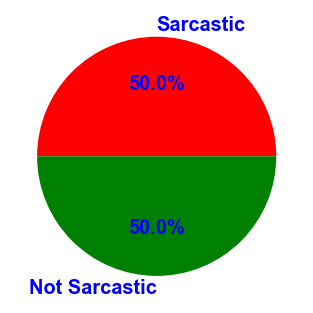

In [271]:
import matplotlib.pyplot as plt
import numpy as np

#Check percentage of Sarcastic and Non-Sarcastic comments

is_sarcastic = round(sum(df['label'])/len(df['label'])*100,1)
not_sarcastic = 100 - is_sarcastic

print(f'is_sarcastic: {is_sarcastic}%, not_sarcastic:{not_sarcastic}%')

y = np.array([is_sarcastic, not_sarcastic])
mylabels = ["Sarcastic", "Not Sarcastic"]

mycolors = ["red", "green"]
plt.pie(y, labels = mylabels,autopct='%.1f%%', textprops=dict(color="blue",size=20, weight="bold"),colors = mycolors)

plt.show() 

In [29]:
# Determine number of words in the 'comment' and 'parent_comment' columns

#Count number of words

def count_words(string):
    # Split the string into words
    words = string.split()
   
    # Return the number of words
    return len(words)

df['w_cnt_comment'] = df['comment'].apply(count_words)
df['w_cnt_pcomment'] = df_full['parent_comment'].apply(count_words)

In [108]:
#Investigate the number of words in both the 'comment' and 'parent_comment' columns - some of the columns seem much longer than
# others

df['w_cnt_comment'].describe()

# The results show that at the 75% percentile, there are 14 words for 'comment'

count    150000.000000
mean     10.514747    
std      12.081958    
min      1.000000     
25%      5.000000     
50%      9.000000     
75%      14.000000    
max      1664.000000  
Name: w_cnt_comment, dtype: float64

In [110]:
df['w_cnt_pcomment'].describe()

# The results show that at the 75% percentile, there are 26 words for 'parent comment'

count    150000.000000
mean     24.405240    
std      41.714666    
min      1.000000     
25%      8.000000     
50%      13.000000    
75%      26.000000    
max      2244.000000  
Name: w_cnt_pcomment, dtype: float64

In [111]:
# Check number of entries with number of words > 120 
# (which is about the 128 word limit for a deep learning transformer encoder like BERT)

df[df['w_cnt_comment'] >= 120].count(),  df[df['w_cnt_pcomment'] >= 120].count()

# 'comment' category has 21 entries with 120 or more words whereas 'parent_comment' category has 3285 entries 
# with 120 or more words. These are a relatively small proportion of either category (<5% at worst). 

(label                   21
 comment                 21
 author                  21
 subreddit               21
 score                   21
 ups                     21
 downs                   21
 created_utc             21
 parent_comment          21
 w_cnt_comment           21
 w_cnt_pcomment          21
 pcomment_red            21
 new_comment             21
 new_pcomment_red        21
 year                    21
 month                   21
 hour                    21
 char_count              21
 word_count              21
 word_density            21
 punctuation_count       21
 uppercase_word_count    21
 dtype: int64,
 label                   3285
 comment                 3285
 author                  3285
 subreddit               3285
 score                   3285
 ups                     3285
 downs                   3285
 created_utc             3285
 parent_comment          3285
 w_cnt_comment           3285
 w_cnt_pcomment          3285
 pcomment_red            3285
 new_comm

## TEXT PRE-PROCESSING 

In [ ]:
# Reduce number of sentences in 'parent_comment' to max 2. 
# This limit accounts for the fact that 75th percentile words for 'parent_comment' are 27 words or less so 2 sentences should
# capture most of the information and at the same time account for minimising "noise" from including too many sentences.
# The reduced sentences will be included in a new feature column 'pcomment_red'

In [32]:
def limit_sent(phrase):
    sentence = ' '.join(re.split(r'(?<=[.?!])\s+', phrase, 2)[:2])
    return sentence

df['pcomment_red'] = df['parent_comment'].apply(limit_sent)

### STOP-WORD REMOVAL

It is not always appropriate to remove stopwords as these can provide important contextual markers in the prediction of sarcasm.

In this project, a test run with stopwords has been carried out and shown to reduce accuracy hence stopwords will be retained.

It may be that the stopword list is too extensive and that a truncated version of the list may be effective in improving scores
by enabling better generalisation - however, this will not be investigated in this project exercise due to time limitations.

For the purposes of project demonstration, the code / procedure that should be run if stopwords were to be removed is retained per below but not executed.

In [33]:
# Check NLTK stopwords list and modify as required

In [34]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
#remove words that are in NLTK stopwords list ("no" and "not" since these are often included in sarcastic expressions)

# Words that commonly feature in sarcastic expressions should be filtered out from the stopwords list
# Some new words should also be added into the filter list

not_stopwords = {'not'} 
reduced_stopwords = set([word for word in stop_words if word not in not_stopwords])

#add words that aren't in the NLTK stopwords list
new_stopwords = {"think","good","get","know","sure","dont","people","cant","one","im","would","thats","youre","hes","didnt","us","could","theyre","would"}
final_stopwords = reduced_stopwords.union(new_stopwords)


final_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cant',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'didnt',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'get',
 'good',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'hes',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'im',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'know',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only

### LOWER-CASING, LEMMATISATION AND REMOVAL OF PUNCTUATION, NUMBERS AND SYMBOLS

Note: Stopwords not removed - code for stopword removal has been commented out below

In [46]:
%%time

def parser(x):
    x = re.sub('[^a-z\s]', '', x.lower())  #drop any symbol except a-z
#   x = [w for w in x.split() if w not in set(final_stopwords)]  #This operation would be required to remove stopwords
    x = [w for w in x.split()]
   
    return ' '.join(x)

df['new_comment'] = df['comment'].apply(lambda x: parser(x))
df['new_pcomment_red'] = df['pcomment_red'].apply(lambda x: parser(x))

Wall time: 3.79 s


### Lemmatization

From: https://opendatagroup.github.io/data%20science/2019/03/21/preprocessing-text.html

"*Lemmatization is a critical step in a number of tasks, but there are times in which it is not appropriate. Some applications decisively benefit from lemmatization. Topic modeling, for example, relies on the distribution of content words, the identification of which is dependent on a string match between words, which is achieved by lemmatizing their forms so that all variants are consistent across documents. TD-IDF and LDA therefore both benefit in general from lemmatization. Lemmatization is also important for training word vectors, since accurate counts within the window of a word would be disrupted by an irrelevant inflection like a simple plural or present tense inflection.*"

Lemmatization has been investigated and found to increase accuracy slightly in TFIDF vectorization results but the increase is not significant. Lemmatization will be incorporated into the text entries in this notebook.

In [ ]:
%%time

#Lemmatize text and store in new columns 'new_comment_lemm' and 'new_pcomment_lemm'

nlp = spacy.load("en_core_web_sm") #load Spacy

def lemmatize(text):

    doc = nlp(text)
    doc = " ".join([token.lemma_ for token in doc])
    
    return doc

df['new_comment_lemm'] = df['new_comment'].apply(lambda x: lemmatize(x))
df['new_pcomment_lemm'] = df['new_pcomment_red'].apply(lambda x: lemmatize(x))

# FEATURE ENGINEERING: META-FEATURES

### NEW FEATURE 1: Separate date / time into individual year, month and hour

In [38]:
# Extract UTC time category into individual date / month / time (hour) features

# import datetime class from datetime module
from datetime import datetime

# Function to extract year
def date_year(string):
    # Split the string into individual date categories
    date = datetime.strptime(string,"%Y-%m-%d %H:%M:%S")
   
    # Return the year
    return date.year

# Function to extract month
def date_month(string):
    # Split the string into individual date categories
    date = datetime.strptime(string,"%Y-%m-%d %H:%M:%S")
   
    # Return the month
    return date.month

# Function to extract hour
def date_hour(string):
    # Split the string into individual date categories
    date = datetime.strptime(string,"%Y-%m-%d %H:%M:%S")
   
    # Return the time (hour)
    return date.hour

df['year'] = df.created_utc.apply(date_year)
df['month'] = df.created_utc.apply(date_month)
df['hour'] = df.created_utc.apply(date_hour)

In [40]:
# Check range of entries by year

df.year.nunique()

# 8 distinct year entries

8

In [41]:
# Check range of entries by month

df.month.nunique()

#12 distinct month entries

12

###  NEW FEATURE 2: Cosine similarity between the comment and context

Methodology: We need a way to compare the context of the comment ("pcomment_red") with the comment ("comment") itself. We will investigate using the cosine similarity between the 2 compared sentences to see if this approach can identify reliable markers for sarcastic posts, such as contradiction in expression. We will use the BERT transformer as a basis to make the comparisons.

From:

https://www.sbert.net/docs/pretrained_models.html

We will employ the "msmarco-distilbert-base-v4" model - this has been tuned to be used with cosine similarity.

In [ ]:
%%time

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('msmarco-distilbert-base-v3')

def cos_sim(text1, text2):
    
    sentences = [text1, text2]
    embeddings = model.encode(sentences, convert_to_tensor = True)

    cos_sim = cosine_similarity(embeddings, embeddings)
    
    return cos_sim[0][1]

In [ ]:
%%time

df['cos_sim'] = df.apply(lambda x: cos_sim(x["new_comment"], x["new_pcomment_red"]), axis = 1)   

### NEW FEATURE 3: Change in sentiment polarity between comment and parent comment

In [ ]:
from textblob import TextBlob

def polarity(text):
    polar_txt = TextBlob(text)
    polar_result = polar_txt.sentiment.polarity
    
    return polar_result

In [ ]:
%%time

df['comment_polar'] = df.apply(lambda x: polarity(x["comment"]), axis = 1)
df['parent_comment_polar'] = df.apply(lambda x: polarity(x["parent_comment"]), axis = 1)
df['polar'] = abs(df['comment_polar']-df['parent_comment_polar'])

In [ ]:
df.head()

### NEW FEATURE 4: Text counts


For the 'comment' column, investigate the significance of the following new features on whether the comment is sarcastic:

* Count total number of characters ('char_count')
* Count total number of words ('word_count')
* Count total number of punctuations ('punctuation count')
* Count total number of uppercase words ('uppercase_word_count')
* Determine word density ('word_density')


In [42]:
%%time
df['char_count'] = df['comment'].apply(len)
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count'] + 1)
df['punctuation_count'] = df['comment'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
df['uppercase_word_count'] = df['comment'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

Wall time: 4.72 s


### NEW FEATURE 5: Part of speech (POS) counts

In [ ]:
%%time

# Returns number of adjectives
def adjectives(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of adjectives
    return pos.count('ADJ')

df['adjective_count'] = df['new_comment'].apply(adjectives)

In [ ]:
%%time

# Returns number of adverbs
def adverbs(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of adverbs
    return pos.count('ADV')

df['adverb_count'] = df['new_comment'].apply(adverbs)

## EXPLORATORY DATA ANALYSIS



### Separate dataset by grouping under sarcastic and non-sarcastic comments 

In [97]:
df_sarc = df[df['label']== 1]
df_nsarc = df[df['label']==0]

### Outliers and the distribution of the textual numeric features

Text(0.5, 1.0, 'Polarity of each class')

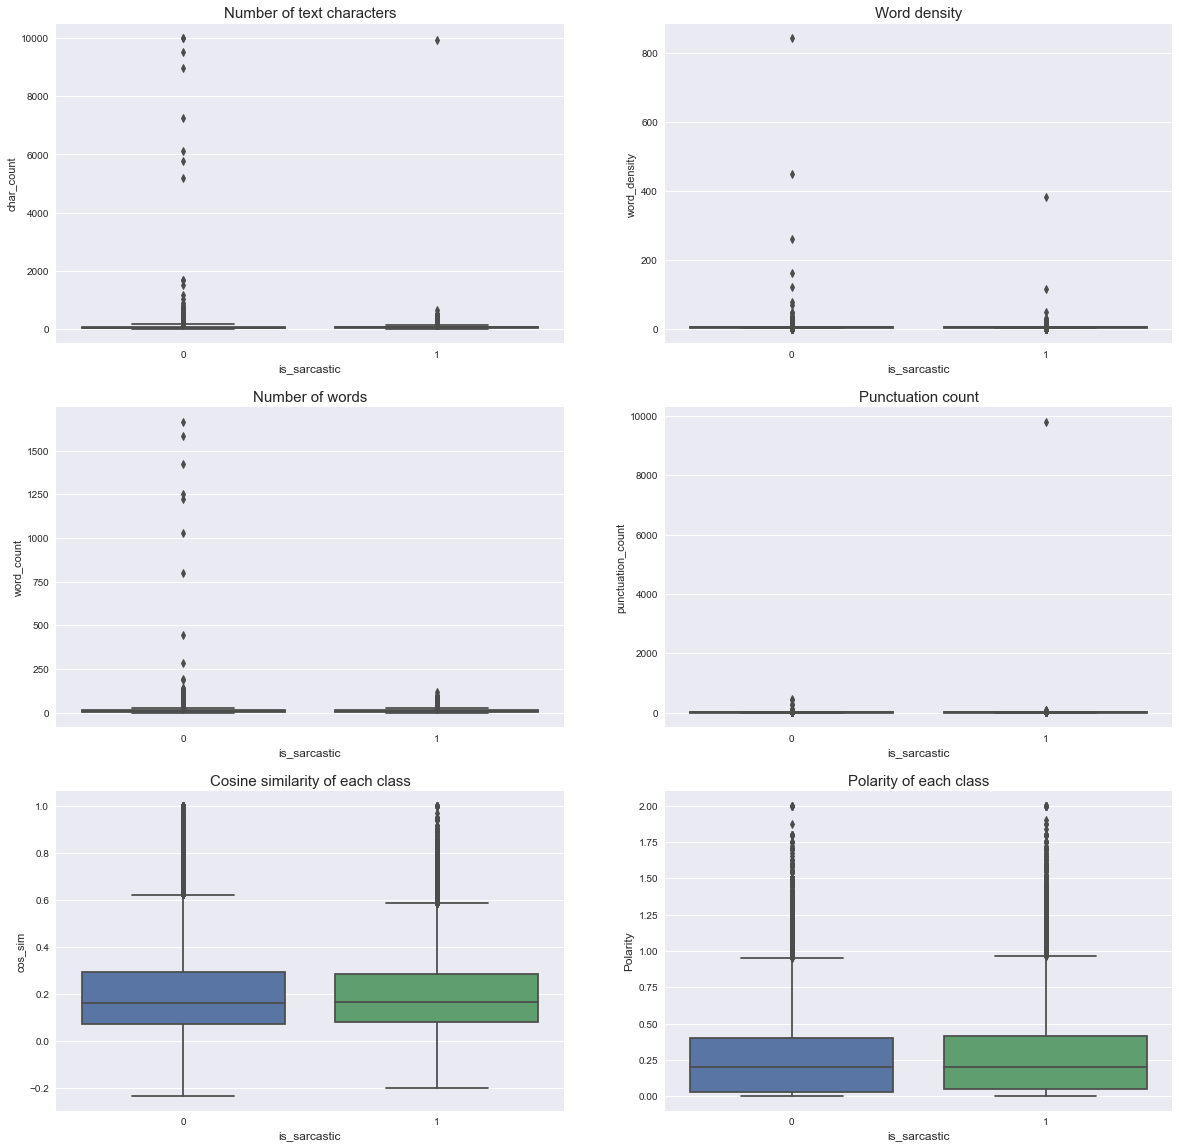

In [270]:
# numeric_col = ['char_count', 'word_count', 'word_density','punctuation_count', 'uppercase_word_count']

f, axes = plt.subplots(3, 2, figsize=(20,20))

sns.boxplot(x='label', y='char_count', data=df, ax=axes[0,0])
axes[0,0].set_xlabel('is_sarcastic', fontsize=12)
plt.ylabel('Number of characters', fontsize=12)
axes[0,0].set_title("Number of text characters", fontsize=15)

sns.boxplot(x='label', y='word_count', data=df, ax=axes[1,0])
axes[1,0].set_xlabel('is_sarcastic', fontsize=12)
plt.ylabel('Number of words', fontsize=12)
axes[1,0].set_title("Number of words", fontsize=15)

sns.boxplot(x='label', y='word_density', data=df, ax=axes[0,1])
axes[0,1].set_xlabel('is_sarcastic', fontsize=12)
plt.ylabel('Word density', fontsize=12)
axes[0,1].set_title("Word density", fontsize=15)

sns.boxplot(x='label', y='punctuation_count', data=df, ax=axes[1,1])
axes[1,1].set_xlabel('is_sarcastic', fontsize=12)
plt.ylabel('Punctuation count', fontsize=12)
axes[1,1].set_title("Punctuation count", fontsize=15)

sns.boxplot(x='label', y='cos_sim', data=df_s, ax=axes[2,0])
axes[2,0].set_xlabel('is_sarcastic', fontsize=12)
plt.ylabel('Cosine similitude', fontsize=12)
axes[2,0].set_title("Cosine similarity of each class", fontsize=15)

sns.boxplot(x='label', y='polar', data=df_s, ax=axes[2,1])
axes[2,1].set_xlabel('is_sarcastic', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
axes[2,1].set_title("Polarity of each class", fontsize=15)



# Check for correlation against numeric features

### Correlation matrix

In [244]:
df_s = pd.read_csv(r'sar2_df.csv') #load file with updated features obtained by running another notebook in parallel

In [259]:
df_s.drop(['Unnamed: 0', 'comment_polar', 'parent_comment_polar', 'pcomment_red', 'created_utc'], axis = 1, inplace = True)

In [260]:
df_s.corr()

,label,score,ups,downs,w_cnt_comment,w_cnt_pcomment,year,month,hour,polar,char_count,word_count,word_density,punctuation_count,uppercase_word_count,cos_sim
label,1.000000,-0.015043,-0.011566,0.055847,-0.013177,-0.002897,-0.054259,-0.028942,0.015538,0.029352,-0.003494,-0.013177,0.076752,-0.017970,-0.016144,-0.010817
score,-0.015043,1.000000,0.854187,-0.017283,0.014910,-0.009493,0.015027,0.010556,0.007821,-0.000879,0.014843,0.014910,0.017510,0.014683,0.006847,0.009710
ups,-0.011566,0.854187,1.000000,0.071126,0.014821,-0.012543,-0.011982,-0.031595,0.008877,0.000261,0.014753,0.014821,0.017456,0.016283,0.007907,0.011945
downs,0.055847,-0.017283,0.071126,1.000000,0.008691,0.007983,-0.322919,-0.477180,-0.000645,0.008157,0.010434,0.008691,0.020014,0.026874,0.004418,0.006476
w_cnt_comment,-0.013177,0.014910,0.014821,0.008691,1.000000,0.130616,-0.018026,-0.003005,0.014927,0.010536,0.960418,1.000000,0.209412,0.345462,0.163898,0.209166
w_cnt_pcomment,-0.002897,-0.009493,-0.012543,0.007983,0.130616,1.000000,-0.009724,-0.005161,0.007644,-0.018926,0.115345,0.130616,0.040209,0.037353,0.009740,0.010848
year,-0.054259,0.015027,-0.011982,-0.322919,-0.018026,-0.009724,1.000000,-0.025377,0.004021,-0.017611,-0.020979,-0.018026,-0.039171,-0.056616,-0.006449,-0.005529
month,-0.028942,0.010556,-0.031595,-0.477180,-0.003005,-0.005161,-0.025377,1.000000,0.001404,-0.001511,-0.003729,-0.003005,-0.010533,-0.012177,-0.004148,-0.004142
hour,0.015538,0.007821,0.008877,-0.000645,0.014927,0.007644,0.004021,0.001404,1.000000,-0.007142,0.015410,0.014927,0.013313,0.008204,0.000530,0.008503
polar,0.029352,-0.000879,0.000261,0.008157,0.010536,-0.018926,-0.017611,-0.001511,-0.007142,1.000000,0.007116,0.010536,0.014135,0.009401,-0.000183,-0.040467


### Correlation heat-map

<AxesSubplot:>

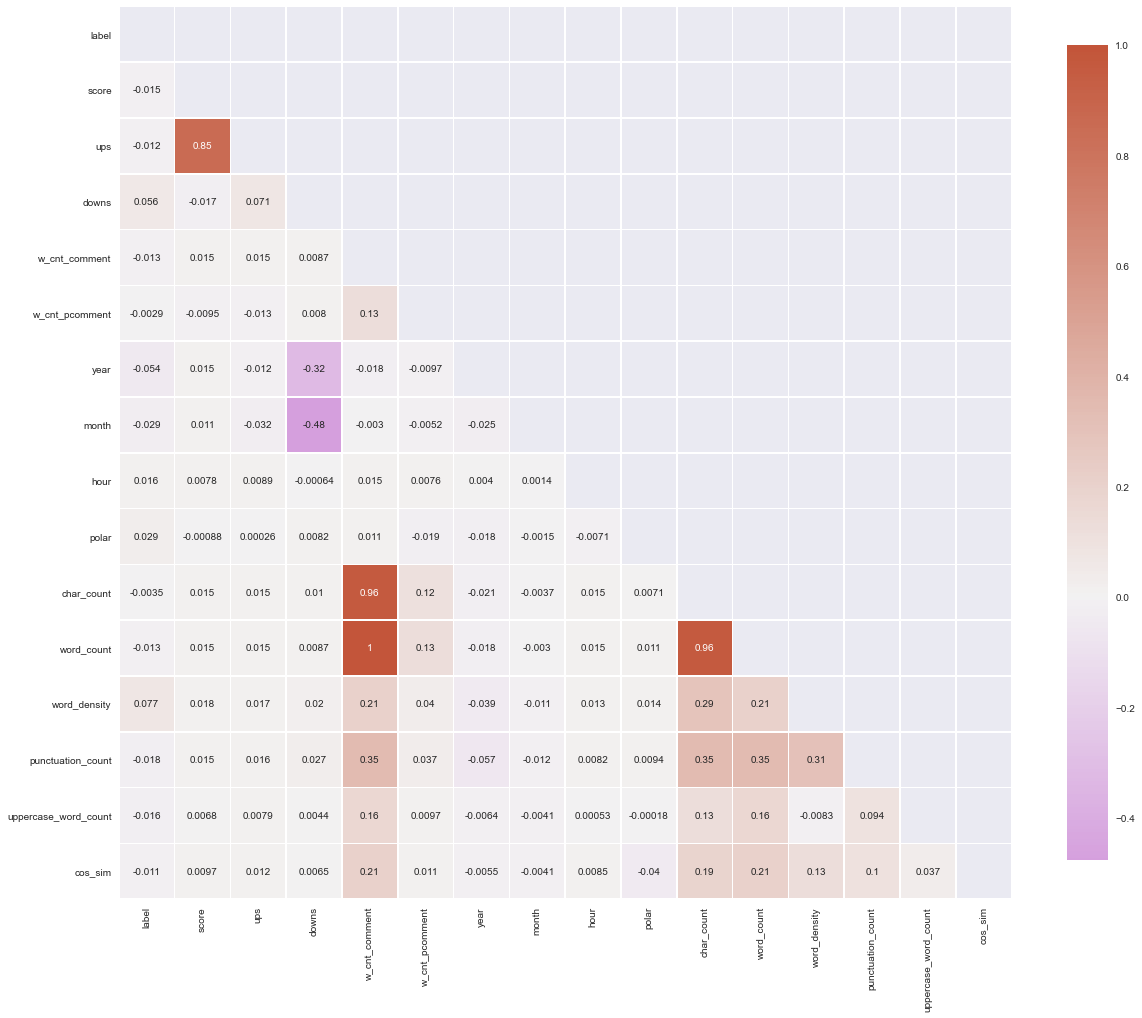

In [262]:
corr = df_s.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axes = plt.subplots(1,1,figsize=(20,20))
cmap = sns.diverging_palette(300, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, square=True
            , linewidths=.5, cbar_kws={"shrink": .75}
            , center=0, annot = True, ax=axes)

### Discussion of comparison of numerical text features:

There appears to be insignificant differentiation between the sarcastic and non-sarcastic comments in terms of numerical text features.

Polarity and Sentence Similarity also do not offer signficant differentiation.

The lack of correlation between Polarity, Sentence Similarity and Text numerical counts points to the broad range of expressing sarcasm in terms of length,
styling of sentences and emotional expression eg. Sarcasm can be expressed as an apparent positive statement, with passive aggression or 
in a neutral, deadpan manner.

### Is there a relationship between the year and sarcastic comment postings?

<AxesSubplot:title={'center':'Comment count by year'}, xlabel='Year', ylabel='Count'>

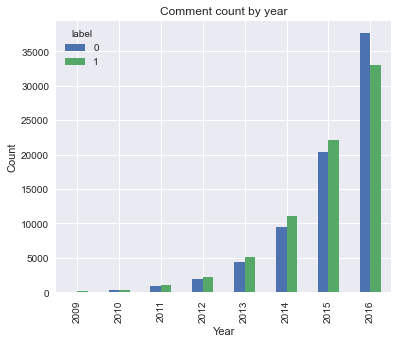

In [163]:
year_sarc_count = df.groupby(['year','label'])['w_cnt_comment'].count().unstack()

year_sarc_count.plot(kind='bar', title='Comment count by year', ylabel='Count',
         xlabel='Year', figsize=(6, 5))


### What is the monthly variation in comment postings?

<AxesSubplot:title={'center':'Comment count by month'}, xlabel='Month', ylabel='Count'>

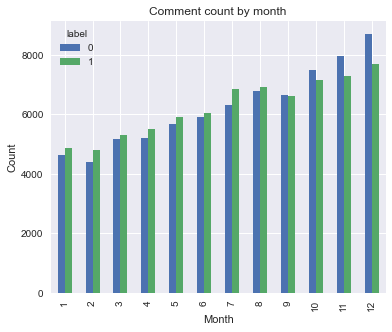

In [165]:
month_sarc_count = df.groupby(['month','label'])['w_cnt_comment'].count().unstack()

month_sarc_count.plot(kind='bar', title='Comment count by month', ylabel='Count',
         xlabel='Month', figsize=(6, 5))

### What is the hour to hour variation in comment postings?

<AxesSubplot:title={'center':'Comment count by hour'}, xlabel='Hour', ylabel='Count'>

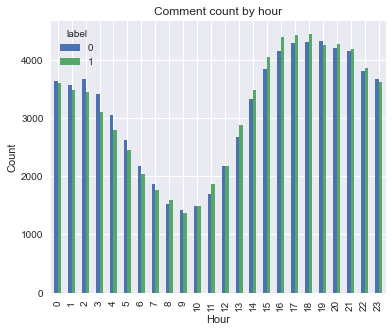

In [164]:
hour_sarc_count = df.groupby(['hour','label'])['w_cnt_comment'].count().unstack()

hour_sarc_count.plot(kind='bar', title='Comment count by hour', ylabel='Count',
         xlabel='Hour', figsize=(6, 5))

### Plot of sarcastic comments made by individual authors

<AxesSubplot:xlabel='author', ylabel='comment'>

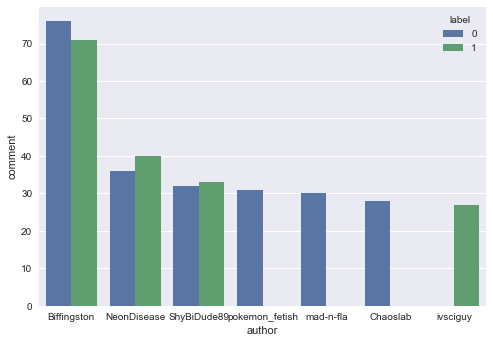

In [240]:
author_sarc_count = df.groupby(['author','label']).count()
a = author_sarc_count.sort_values("comment", ascending = False)

a = a.iloc[0:10]

a = pd.DataFrame(a)

b = a.reset_index()

b.head()
sns.barplot(x=b.author, y=b.comment, hue = b.label)

### DISCUSSION ON VARIATION PLOTS:

There appears to be little differentiation that can be extracted from the above plots due to the balanced nature of the dataset at hand (50/50). 

While there appear to be definitive spikes in overall number of comments, the distinction between Sarcastic and Non-Sarcastic comments cannot be inferred.

However, despite the balancing of numbers of comments in each category, the plotting of posts by authors yields the insight that sarcasm appears to be a 
personality trait, with some posters not posting any sarcastic comments at all ('Chaoslab'), or conversely only posting sarcastic comments ('ivsciguy')

### Determine most common words

In [48]:
# Determine 10 most common words  

from collections import Counter

def count_most_common(text):

    return Counter(" ".join(text).split()).most_common(10)
   

In [52]:
%%time

# First remove stop words

def remove_stop(x):
    
    x = [w for w in x.split() if w not in set(final_stopwords)]  #This operation would be required to remove stopwords
    return ' '.join(x)

df_sarc['new_comment'] = df_sarc['new_comment'].apply(lambda x: remove_stop(x))
df_nsarc['new_comment'] = df_nsarc['new_comment'].apply(lambda x: remove_stop(x))



Wall time: 6.61 s


In [53]:
# Top 10 most common words in sarcastic comments

count_most_common(df_sarc['new_comment'])

[('yeah', 4714),
 ('not', 4382),
 ('like', 3882),
 ('well', 2782),
 ('right', 2198),
 ('yes', 1819),
 ('oh', 1409),
 ('make', 1401),
 ('really', 1355),
 ('man', 1352)]

In [54]:
# Top 10 most common words in non-sarcastic comments

count_most_common(df_nsarc['new_comment'])

[('not', 5085),
 ('like', 4374),
 ('money', 2149),
 ('fuck', 2034),
 ('well', 1810),
 ('time', 1559),
 ('really', 1493),
 ('comcast', 1453),
 ('yeah', 1345),
 ('see', 1301)]

<Figure size 4000x4000 with 0 Axes>

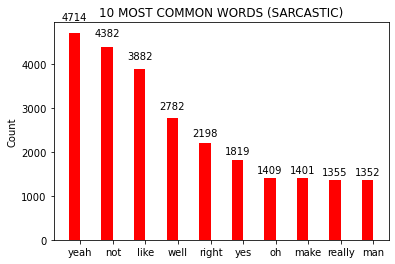

In [55]:
# Plot 10 most common words used in sarcastic comments

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(50, 50), dpi=80)

data_sarc = count_most_common(df_sarc['new_comment'])
names, values = zip(*data_sarc) 

ind = np.arange(len(data_sarc))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.title("10 MOST COMMON WORDS (SARCASTIC)")
plt.show()

<Figure size 2400x2400 with 0 Axes>

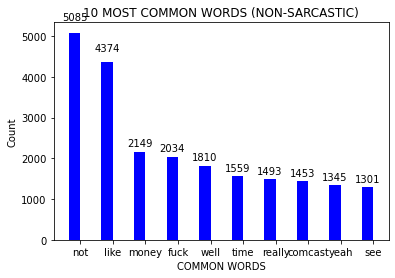

In [56]:
# Plot 10 most common words in non-sarcastic comments

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(30, 30), dpi=80)

data_nsarc = count_most_common(df_nsarc['new_comment'])
names, values = zip(*data_nsarc) 

ind = np.arange(len(data_nsarc))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.title("10 MOST COMMON WORDS (NON-SARCASTIC)")
plt.xlabel('COMMON WORDS')
plt.show()

### DISCUSSION ON MOST COMMON WORDS:

The plots indicate that certain stop words are strong markers for sarcasm, such as the term "yeah". Although this also features in the non-sarcastic category the occurences are suitably separated by order of magnitude. Additionally, it is noted that the 10 most common words in sarcastic comments are almost entirely composed of common stopwords.This justifies the caution in removing Stopwords wholesale; although it may be warranted to revisit the removal of stopwords with a suitably revised word list.

### PLOT WORD CLOUDS FOR SARCASTIC ENTRIES

In [57]:
# Concatenate texts into a single list

all_sarc = df_sarc['new_comment'].str.split(' ')

all_sarc_cleaned = []

for text in all_sarc:
    text = [x.strip(string.punctuation) for x in text]
    all_sarc_cleaned.append(text)

all_sarc_cleaned[0]

text_sarc = [" ".join(text) for text in all_sarc_cleaned]
final_text_sarc = " ".join(text_sarc)
final_text_sarc[:500]

'like assume kids handle mature content therefore parents bad parents understand clearly isnt enough gun control defenders fault neymar amazing talent nothing wrong defender made mad perfectly acceptable neymar redditors user press altf nice job bro facts confident totally unbiased news paper take anything said context go armoury nearest puma store bring tent wait till aug th go sale trump supporters violent make violent sincerely apologize butthurt relationship status may caused thought economy '

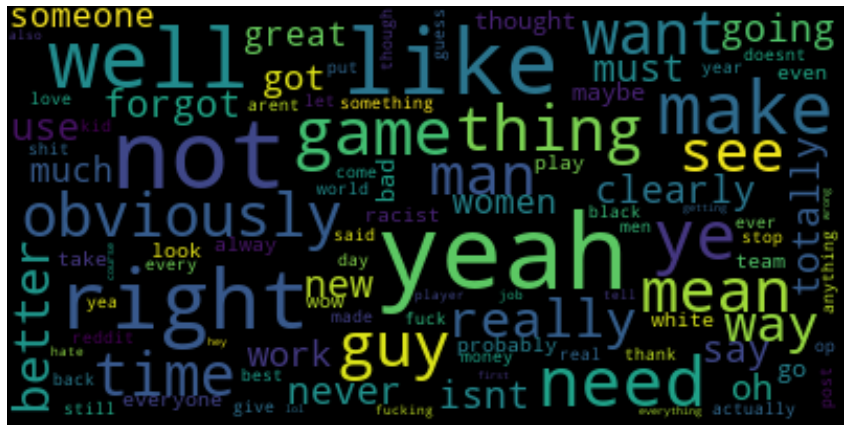

In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = final_stopwords

wordcloud_sarc = WordCloud(stopwords=stopwords, background_color="black", max_font_size=50, max_words=100).generate(final_text_sarc)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_sarc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Examine word cloud for subreddit group 'worldnews' 

The database is too large and with too many sub-topics to facilitate meaningful topic identification.

We will look instead at one of the most commented Reddit sub-groups 'worldnews' to extract meaningful topics.

In this case, we have already identified most common words, many of which are stopwords. 

Hence, this time we will filter out the majority of stop words.

In [64]:
df_sarc_news = df_sarc[df_sarc['subreddit']=='worldnews']

In [263]:
# Concatenate sarcastic texts in 'worldnews' subreddit into a single list

all_sarc_news = df_sarc_news['new_comment'].str.split(' ')

all_sarc_newscleaned = []

for text in all_sarc_news:
    text = [x.strip(string.punctuation) for x in text]
    all_sarc_newscleaned.append(text)

all_sarc_newscleaned[0]

text_sarc = [" ".join(text) for text in all_sarc_newscleaned]
final_text_news_sarc = " ".join(text_sarc)
final_text_news_sarc[:500]

'also control media eat kids kidnap women steal jobs wonder governments employ employ full time professional bureaucrats handle government negations diplomacy research issues yeah really gonna trade ccp keep biotruths coming yes not even unpaid maternity leave half mothers country great way ensuring kids mothers great time said americans annexed crimea least free market fix like passenger pigeon buffalo exactly israeli say india fucked rule replying old comments antisemitic ones count need keep p'

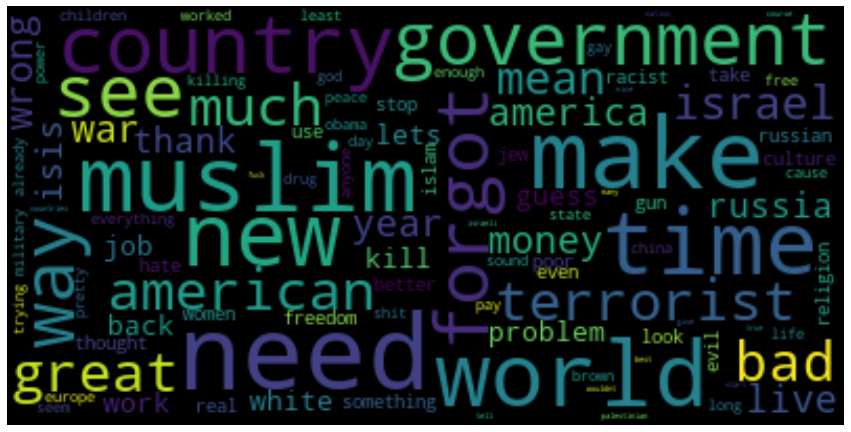

In [115]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = final_stopwords
stopwords.update(["well","wow","definitely","want","wont","like","doesnt","nothing","also","hey","must","arent","ok","things",
                  "every","someone","surely","yea","let","guys","ever","always","got","come","yeah", "right",
                  "really","not","thing","oh","totally","yes","guy","everyone","clearly","anything","say",
                  "man","woman","go","happen","going","isnt","probably","though","never","obviously","maybe"])
wordcloud_sarc = WordCloud(stopwords=stopwords, background_color="black", max_font_size=50, max_words=100).generate(final_text_news_sarc)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_sarc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [265]:
df_nsarc_news = df_nsarc[df_nsarc['subreddit']=='worldnews']

In [266]:
# Concatenate non-sarcastic texts in 'worldnews' subreddit into a single list

all_nsarc_news = df_nsarc_news['new_comment'].str.split(' ')

all_nsarc_newscleaned = []

for text in all_nsarc_news:
    text = [x.strip(string.punctuation) for x in text]
    all_nsarc_newscleaned.append(text)

all_nsarc_newscleaned[0]

text_sarc = [" ".join(text) for text in all_nsarc_newscleaned]
final_text_news_nsarc = " ".join(text_sarc)
final_text_news_nsarc[:500]

'false equivalence which is apparently being confirmed seeing how this nonissue is nearing the front page excactly along with the massive monetary and reconnaissance support they received as well as the massive concessions they made after the coup huh kirchner is using this to move attention away from more pressing matters what the fuck the factory closed because kimberlyclark was unable to get the necessary raw materials but the bankrupt vz government is somehow going to be able to buy them not '

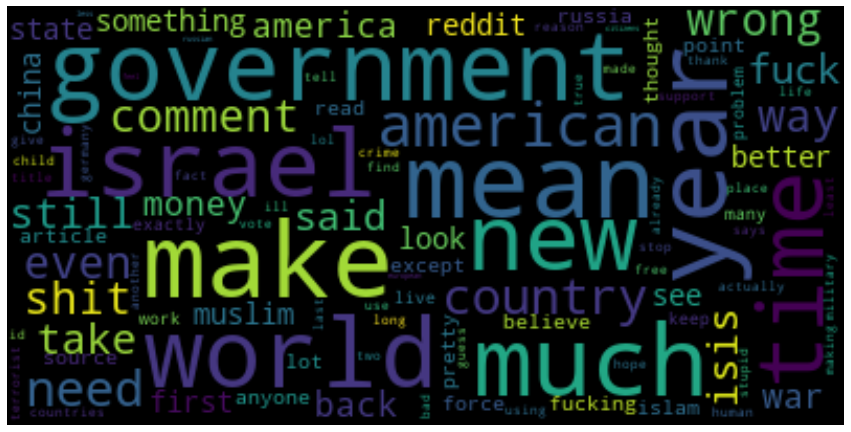

In [268]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = final_stopwords
stopwords.update(["well","wow","definitely","want","wont","like","doesnt","nothing","also","hey","must","arent","ok","things",
                  "every","someone","surely","yea","let","guys","ever","always","got","come","yeah", "right",
                  "really","not","thing","oh","totally","yes","guy","everyone","clearly","anything","say",
                  "man","woman","go","happen","going","isnt","probably","though","never","obviously","maybe"])
wordcloud_nsarc = WordCloud(stopwords=stopwords, background_color="black", max_font_size=50, max_words=100).generate(final_text_news_nsarc)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_sarc, interpolation='bilinear')
plt.axis("off")
plt.show()

### TOPIC IDENTIFICATION WITH LATENT DIRICHLET ALLOCATION 

### Investigate topics in the 'worldnews' subreddit group that generate sarcastic comments

In [77]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [78]:
from pprint import pprint

In [79]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models

In [80]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Yuan\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
# Convert sarcastic headlines (only) to list
data = df_sarc_news.new_comment.values.tolist()

pprint(data[:1])

['also control media eat kids kidnap women steal jobs']


In [82]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['also', 'control', 'media', 'eat', 'kids', 'kidnap', 'women', 'steal', 'jobs']]


In [83]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['also', 'control', 'media', 'eat', 'kids', 'kidnap', 'women', 'steal', 'jobs']


In [84]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(data_words)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [90]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [91]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['control', 'medium', 'eat', 'kid', 'kidnap', 'woman', 'steal', 'job']]


In [92]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [93]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('control', 1),
  ('eat', 1),
  ('job', 1),
  ('kid', 1),
  ('kidnap', 1),
  ('medium', 1),
  ('steal', 1),
  ('woman', 1)]]

In [94]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

In [95]:
# Print the Keyword in the top 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"need" + 0.020*"work" + 0.015*"way" + 0.013*"mean" + 0.013*"use" + '
  '0.013*"take" + 0.011*"say" + 0.011*"problem" + 0.011*"american" + '
  '0.010*"america"'),
 (1,
  '0.018*"terrorist" + 0.017*"muslim" + 0.016*"country" + 0.012*"great" + '
  '0.011*"attack" + 0.009*"look" + 0.009*"tell" + 0.009*"police" + '
  '0.008*"china" + 0.008*"jew"'),
 (2,
  '0.030*"make" + 0.018*"see" + 0.017*"time" + 0.015*"bad" + 0.013*"well" + '
  '0.013*"world" + 0.012*"year" + 0.012*"government" + 0.011*"think" + '
  '0.011*"war"'),
 (3,
  '0.017*"forget" + 0.017*"much" + 0.014*"stop" + 0.013*"israel" + 0.012*"try" '
  '+ 0.012*"give" + 0.010*"do" + 0.010*"live" + 0.010*"white" + 0.009*"job"'),
 (4,
  '0.022*"kill" + 0.012*"let" + 0.012*"s" + 0.012*"racist" + 0.012*"state" + '
  '0.010*"know" + 0.010*"happen" + 0.009*"help" + 0.008*"culture" + '
  '0.008*"support"')]


In [276]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how generalised the model is. lower the better.

# Compute Coherence Score (a score of 0.6 is high)
# Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.431488645242393

Coherence Score:  0.598347083781149


### VISUALIZE TOPICS WITH pyLDAvis

In [96]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.263171  0.048734  1       1        22.106975
0      0.070313 -0.202833  2       1        21.155401
3      0.135306  0.213040  3       1        20.155091
4      0.032044 -0.035956  4       1        18.704830
1      0.025507 -0.022985  5       1        17.877703, topic_info=        Term       Freq      Total Category  logprob  loglift
315   make    77.000000  77.000000  Default  30.0000  30.0000
249   kill    47.000000  47.000000  Default  29.0000  29.0000
61    need    49.000000  49.000000  Default  28.0000  28.0000
410   work    48.000000  48.000000  Default  27.0000  27.0000
299   see     46.000000  46.000000  Default  26.0000  26.0000
...   ...           ...        ...      ...      ...      ...
1301  kind    9.280984   9.908143   Topic5  -5.4018   1.6562 
789   wear    9.016154   9.650028   Topic5  -5.4308   1.6537 
536   hear    8.631009   9.247891   Topic5  -5.4744   1.6526 
1432  truth   8.537231   9.148770   Topic5  -5.4854   1.6524 
637   commit  8.618865   9.249077   Topic5  -5.4758   1.6510 

[180 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
742   3      0.988463  act     
889   2      0.928933  actually
230   4      0.943451  already 
439   2      0.993685  america 
36    2      0.975852  american
...  ..           ...      ... 
262   3      0.957292  white   
410   2      0.980768  work    
105   1      0.980450  world   
301   1      0.979045  wrong   
302   1      0.967189  year    

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])